classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



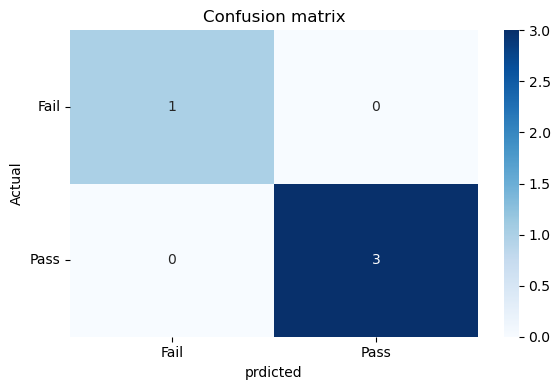

.......predict your Result.....
prediction based on input:Pass


c:\Users\ADMINS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 
df=pd.read_csv("student_success_dataset.csv")
le=LabelEncoder()
df['Internet']=le.fit_transform (df['Internet'])
df['Passed']=le.fit_transform(df['Passed'])
features=['StudyHours','Attendance','PastScore','SleepHours']
scaler=StandardScaler()
df_scaled=df.copy()
df_scaled[features]=scaler.fit_transform(df[features])
X=df_scaled[features]
Y=df_scaled['Passed']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
print("classification_report")
print(classification_report(Y_test,Y_pred))
conf_matrix=confusion_matrix(Y_test,Y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.xlabel("prdicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.xticks([0.5,1.5],['Fail','Pass'])
plt.yticks([0.5,1.5],['Fail','Pass'],rotation=0)
plt.tight_layout()
plt.show()
print(".......predict your Result.....")

try:
    Study_Hours=float(input("Enter your study hours"))
    Attendance=float(input("Enter your Attendance "))
    Past_score=float(input("Enter your past score"))
    Sleep_Hours=float(input("Enter how may hours do you sleep"))
    user_input_df=pd.DataFrame([{
    "StudyHours":Study_Hours,
    "Attendance":Attendance,
    "PastScore":Past_score,
    "SleepHours":Sleep_Hours
}])
    user_input_scaled=scaler.transform(user_input_df)
    prdiction=model.predict(user_input_scaled)[0]
    result="Pass" if prdiction==1 else "Fail"
    print(f'prediction based on input:{result}')
except Exception as e:
 print("An error occured:",e)